## **1. Loading libraries and data**

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/For_modeling.csv


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

pd.set_option('display.max_columns',200)
np.random.seed(24)

In [3]:
df = pd.read_csv("/kaggle/input/For_modeling.csv"
).sample(frac=1)
df.head()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
6023108,6176536,19,3720,37.613956,127.030251,37.638706,127.015907,3.028153,9,13,3,54,3,9,13,4,15,3,20.9,0.0,1.7,68.0,0.00,0.0,20.0,27.0
8362825,8576807,16,2970,37.586388,126.935127,37.564541,126.927071,2.530896,11,5,13,45,0,11,5,14,2,0,16.8,0.0,1.1,46.0,1.71,0.0,23.2,58.0
8498770,8714908,5,980,37.464550,126.883728,37.456841,126.888344,0.949100,11,10,8,50,5,11,10,8,56,5,9.3,0.0,0.3,85.0,0.07,0.0,8.7,83.0
4485209,4599459,6,980,37.546307,127.049805,37.539654,127.052589,0.779438,8,1,12,17,2,8,1,12,23,2,36.8,0.0,1.3,39.0,2.80,0.0,54.9,37.0
4348700,4460101,59,8880,37.556610,126.898018,37.556610,126.898018,0.000000,7,27,21,17,4,7,27,22,16,4,30.3,0.0,1.1,75.0,0.00,0.0,30.2,28.0


In [4]:
df.shape

(9601139, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9601139 entries, 6023108 to 6292355
Data columns (total 26 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   Duration    int64  
 2   Distance    int64  
 3   PLong       float64
 4   PLatd       float64
 5   DLong       float64
 6   DLatd       float64
 7   Haversine   float64
 8   Pmonth      int64  
 9   Pday        int64  
 10  Phour       int64  
 11  Pmin        int64  
 12  PDweek      int64  
 13  Dmonth      int64  
 14  Dday        int64  
 15  Dhour       int64  
 16  Dmin        int64  
 17  DDweek      int64  
 18  Temp        float64
 19  Precip      float64
 20  Wind        float64
 21  Humid       float64
 22  Solar       float64
 23  Snow        float64
 24  GroundTemp  float64
 25  Dust        float64
dtypes: float64(13), int64(13)
memory usage: 1.9 GB


## **2. Exploratory Data Analysis**

In [6]:
df.columns

Index(['Unnamed: 0', 'Duration', 'Distance', 'PLong', 'PLatd', 'DLong',
       'DLatd', 'Haversine', 'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek',
       'Dmonth', 'Dday', 'Dhour', 'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind',
       'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust'],
      dtype='object')

In [7]:
df.describe()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,4.923152e+06,2.580294e+01,3.713519e+03,3.754761e+01,1.269908e+02,3.754770e+01,1.269907e+02,1.870315e+00,7.578754e+00,1.576714e+01,1.437801e+01,2.914948e+01,2.943812e+00,7.579198e+00,1.576666e+01,1.442620e+01,2.999278e+01,2.945771e+00,1.856201e+01,1.784856e-02,1.819274e+00,5.397565e+01,7.300679e-01,9.948924e-03,2.072376e+01,3.245798e+01
std,2.841734e+06,2.504333e+01,3.956611e+03,4.441376e-02,8.257065e-02,4.445305e-02,8.323726e-02,1.995361e+00,2.696797e+00,8.748012e+00,6.249244e+00,1.725837e+01,1.976063e+00,2.696781e+00,8.747788e+00,6.484493e+00,1.730960e+01,1.977624e+00,9.498075e+00,3.736282e-01,9.710258e-01,1.742159e+01,9.175004e-01,1.628091e-01,1.265221e+01,2.407264e+01
min,0.000000e+00,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,2.466320e+06,8.000000e+00,1.230000e+03,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,1.000000e+01,1.400000e+01,1.000000e+00,6.000000e+00,8.000000e+00,1.000000e+01,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,4.921318e+06,1.600000e+01,2.280000e+03,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,1.600000e+01,2.900000e+01,3.000000e+00,8.000000e+00,1.600000e+01,1.600000e+01,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,7.389176e+06,3.600000e+01,4.620000e+03,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,1.900000e+01,4.400000e+01,5.000000e+00,1.000000e+01,2.300000e+01,2.000000e+01,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,9.830310e+06,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


**Observations:**

1. Distance: There are no negative or 0 values
1. Haversine: there are data points where the haversine value is 0.

**Observation analysis 1. Distance**  
Exploring the data points where the distance is negative.

In [8]:
df.shape

(9601139, 26)

In [9]:
df[df['Distance']<0].shape

(0, 26)

In [10]:
df[df['Distance']<0].head()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust


we don't have any negative value in the distance column

**Observation analysis 2. haversine**    
Exploring the data points where the haversine value is 0.   
It should mean that pick up and drop off location (longitude and latitude) are the same.

In [11]:
df.shape

(9601139, 26)

In [12]:
df[df['Haversine']==0].shape

(955083, 26)

In [13]:
df[df['Haversine']==0].reset_index().drop(columns=['index']).head()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,4460101,59,8880,37.556610,126.898018,37.556610,126.898018,0.0,7,27,21,17,4,7,27,22,16,4,30.3,0.0,1.1,75.0,0.00,0.0,30.2,28.0
1,539962,47,6520,37.546631,127.155884,37.546631,127.155884,0.0,3,17,16,24,5,3,17,17,12,5,13.7,0.0,2.1,28.0,1.88,0.0,18.5,43.0
2,5305265,66,10280,37.658588,127.035210,37.658588,127.035210,0.0,8,21,20,57,1,8,21,22,4,1,27.7,0.0,1.6,69.0,0.01,0.0,24.8,26.0
3,694945,17,1760,37.519363,126.926048,37.519363,126.926048,0.0,3,28,17,24,2,3,28,17,42,2,17.6,0.0,4.2,45.0,0.70,0.0,17.1,28.0
4,2976108,39,6620,37.537308,127.070351,37.537308,127.070351,0.0,6,16,21,6,5,6,16,21,45,5,23.7,0.0,1.7,64.0,0.00,0.0,21.9,33.0


In [14]:
df[df['Haversine']==0].reset_index().drop(columns=['index']).describe()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.550830e+05,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.0,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000
mean,4.660921e+06,49.878425,5741.102458,37.546596,126.989714,37.546596,126.989714,0.0,7.367401,15.648030,15.695371,29.346679,3.190157,7.368260,15.646774,15.795307,29.606122,3.191605,20.290335,0.015202,1.937013,51.137753,0.896492,0.007591,23.291317,32.303018
std,2.697950e+06,30.473000,5351.125553,0.045334,0.084399,0.045334,0.084399,0.0,2.556475,8.761283,5.232936,17.260827,2.066626,2.556467,8.761114,5.831401,17.347721,2.069881,8.441664,0.309063,0.961516,17.037958,0.991830,0.143294,11.826363,23.582992
min,0.000000e+00,2.000000,1.000000,37.437271,126.798599,37.437271,126.798599,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-17.800000,0.000000,0.000000,10.000000,0.000000,0.000000,-13.600000,0.000000
25%,2.304694e+06,26.000000,1720.000000,37.514088,126.918503,37.514088,126.918503,0.0,5.000000,8.000000,13.000000,14.000000,1.000000,5.000000,8.000000,13.000000,15.000000,1.000000,15.700000,0.000000,1.200000,38.000000,0.000000,0.000000,15.800000,16.000000
50%,4.642039e+06,47.000000,3990.000000,37.542816,126.995476,37.542816,126.995476,0.0,8.000000,16.000000,17.000000,29.000000,3.000000,8.000000,16.000000,17.000000,29.000000,3.000000,21.600000,0.000000,1.800000,50.000000,0.510000,0.000000,23.300000,27.000000
75%,6.903436e+06,69.000000,8320.000000,37.572113,127.062424,37.572113,127.062424,0.0,9.000000,23.000000,20.000000,44.000000,5.000000,9.000000,23.000000,20.000000,45.000000,5.000000,26.300000,0.000000,2.600000,63.000000,1.680000,0.000000,30.300000,42.000000
max,9.830310e+06,119.000000,33290.000000,37.689720,127.180267,37.689720,127.180267,0.0,12.000000,31.000000,23.000000,59.000000,6.000000,12.000000,31.000000,23.000000,59.000000,6.000000,39.400000,35.000000,7.400000,98.000000,3.520000,8.800000,62.200000,304.000000


* Despite having a haversine distance of 0, indicating that the pick-up and drop-off locations are identical, the duration of trips exhibits a minimum value of 2 minutes and a maximum value of 119 minutes.

* This suggests that bicycles may have traveled round-trip journeys, returning to the pick-up location after visiting other destinations.

* The removal of such data points could potentially impact the performance of the model. However we dont have any additional info about round trips. But we can't remove them for the time being.

* NOTE: In future we can add new feature to record the round trips or better an new long,latd coumns to record the co-ordinates of the midpoint of the entire journey. Which will help us in confirming about round trips.

In [15]:
df[df['Distance']==0].shape

(0, 26)

In [16]:
filtered_df = df.loc[(df['Distance'] == 0) &
                      (df['Haversine'] == 0) &
                      (df['Pmonth'] == df['Dmonth']) &
                      (df['Pday'] == df['Dday']) &
                      (df['Phour'] == df['Dhour']) &
                      (df['Pmin'] == df['Dmin']) &
                      (df['PDweek'] == df['DDweek'])]

# Print the filtered DataFrame
filtered_df

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust


we don't have distance and haversine is 0 at the same time

In [17]:
filtered_df.shape

(0, 26)

If both the Haversine distance and the actual distance are 0, then it is likely that the bicycle has not moved at all. This could be due to a number of reasons, such as:

* The bicycle was parked for the entire duration of the trip.
* The bicycle was moved a very short distance, but not enough to register on the GPS device.
* There was an error in the GPS data.


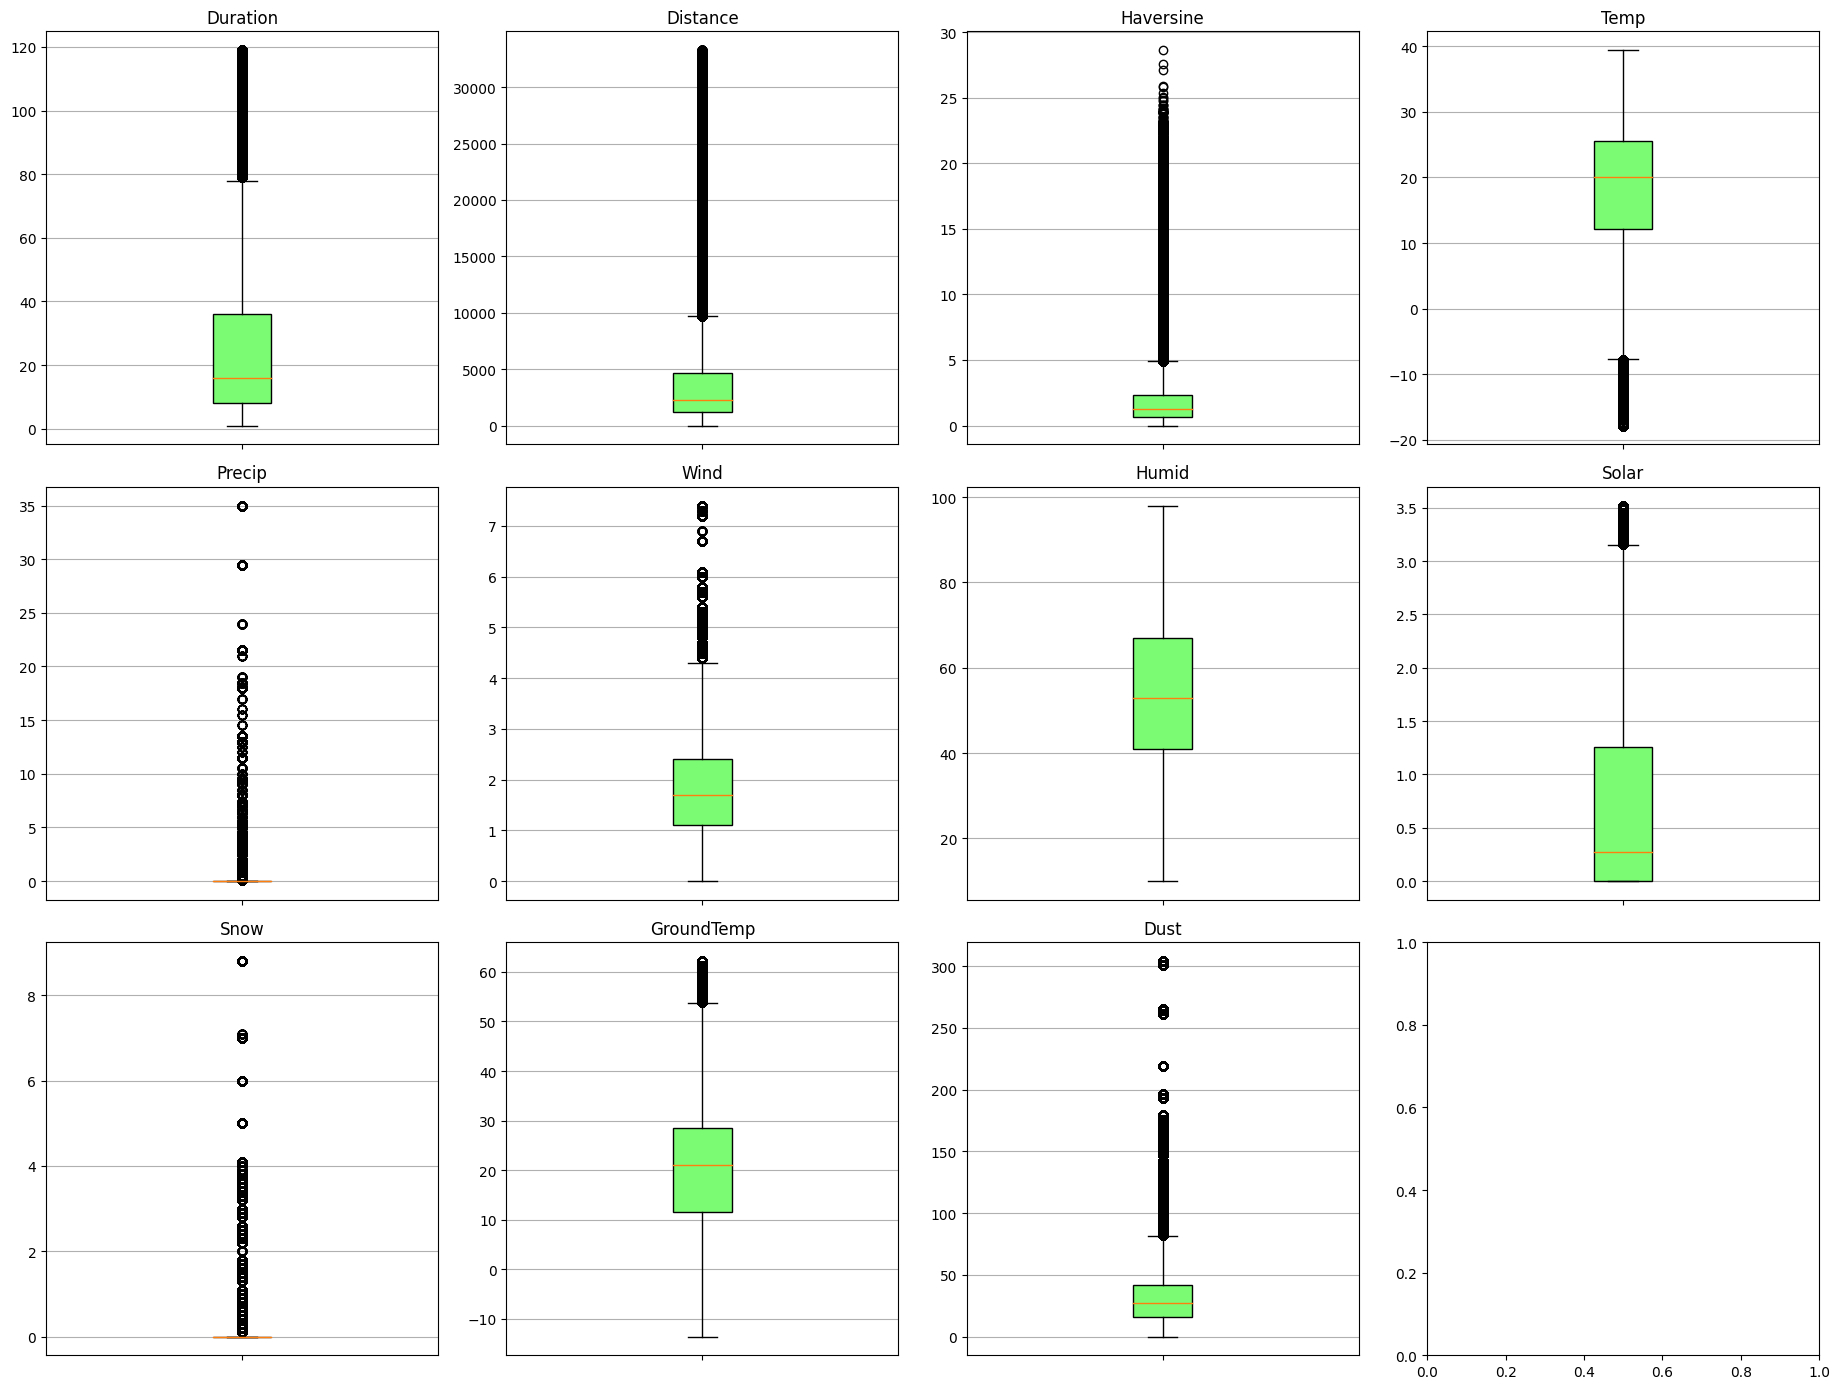

In [18]:
num_vars = ['Duration', 'Distance', 'Haversine','Temp','Precip', 'Wind', 'Humid', 'Solar', 'Snow','GroundTemp', 'Dust'] 

fig, axes = plt.subplots(nrows=3,ncols=4) # create figure and axes

axes = axes.flatten() # Flatten the axes array for easy iteration

for i,col in enumerate(num_vars):
    ax = axes[i]
    box = ax.boxplot(df[col], patch_artist=True)
    box['boxes'][0].set_facecolor('#7BFB74')
    ax.set_xticklabels([])
    ax.set_title(col)
    ax.yaxis.grid(True)

fig.set_size_inches(18.5,14)
plt.tight_layout()
plt.show()

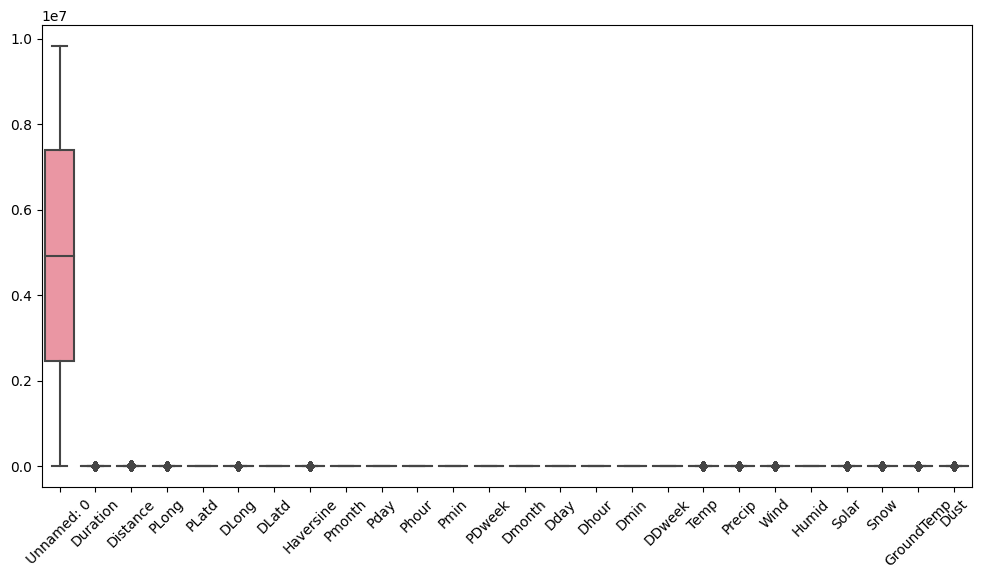

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(
    data=df.select_dtypes(include=[np.number]),
    ax=ax
)
plt.xticks(rotation=45)
plt.show()

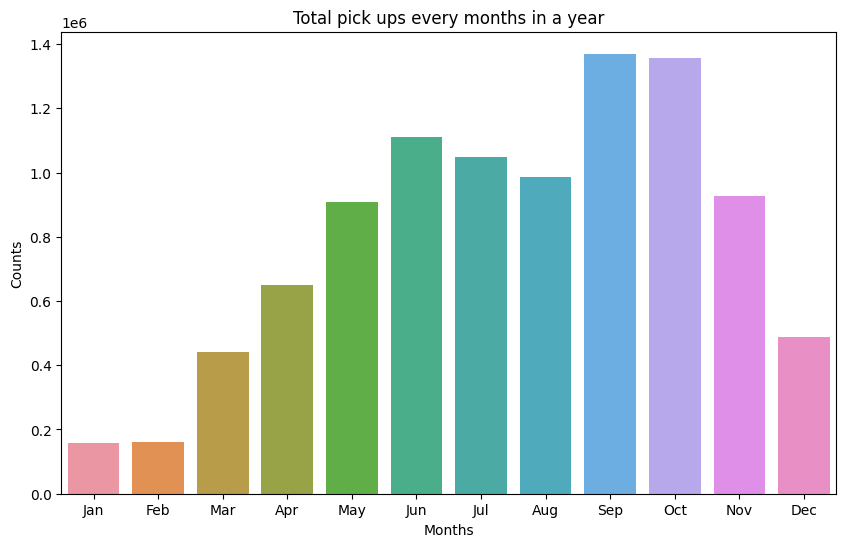

In [20]:
# Total pick ups every months in a year
pivot_table1 = df.pivot_table(index='Pmonth', aggfunc={'Pmonth': 'count'})

month_map ={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
pivot_table1.index = pivot_table1.index.map(month_map)

# Get the pick-up months and trip counts
pick_up_months = pivot_table1.index.to_numpy()
trips_count = pivot_table1['Pmonth'].to_numpy()

plt.figure(figsize=(10,6))
sns.barplot(x=pick_up_months,y=trips_count)
plt.xlabel("Months")
plt.ylabel("Counts")
plt.title("Total pick ups every months in a year")
plt.show()

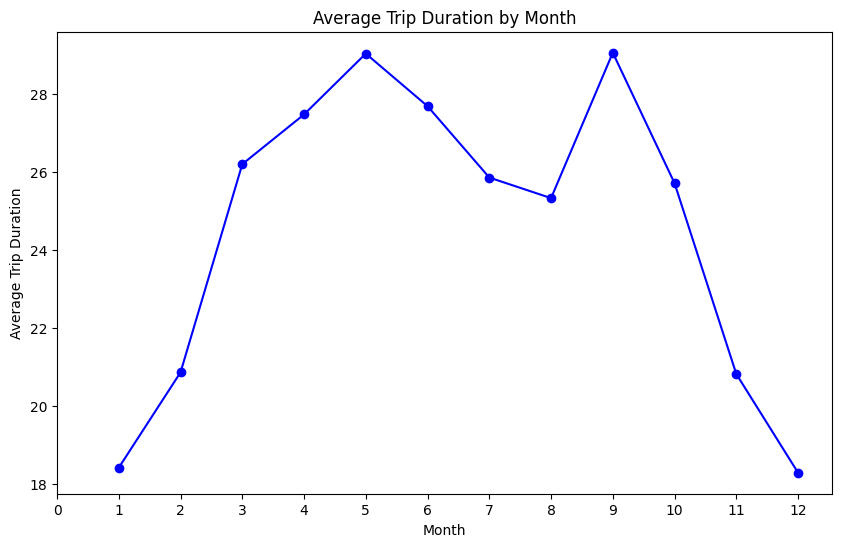

In [21]:
# Calculate average trip duration by month
df_avg_duration_by_month = df.groupby(['Pmonth'])['Duration'].mean()

# Plot average trip duration by month
plt.figure(figsize=(10, 6))
plt.plot(df_avg_duration_by_month.index, df_avg_duration_by_month.values,'b-o')
plt.xlabel('Month')
plt.xticks(range(len(df_avg_duration_by_month.index)+1))
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Month')
plt.show()

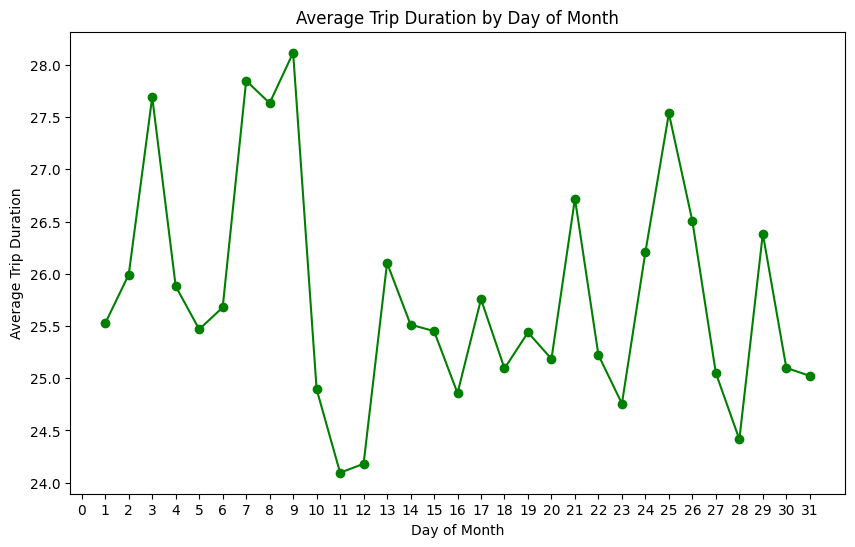

In [22]:
# Calculate average trip duration by day of the month
df_avg_duration_by_day_of_month = df.groupby(['Pday'])['Duration'].mean()

# Plot average trip duration by day of the month
plt.figure(figsize=(10, 6))
plt.plot(df_avg_duration_by_day_of_month.index, df_avg_duration_by_day_of_month.values,'g-o')
plt.xlabel('Day of Month')
plt.xticks(range(len(df_avg_duration_by_day_of_month.index)+1))
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Day of Month')
plt.show()

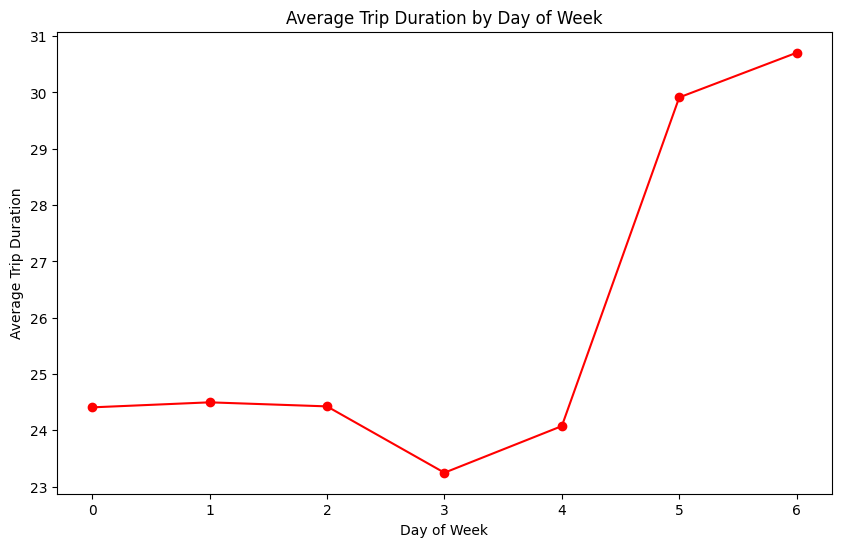

In [23]:
# Calculate average trip duration by day of the week
df_avg_duration_by_day_of_week = df.groupby(['PDweek'])['Duration'].mean()

# Plot average trip duration by day of the week
plt.figure(figsize=(10, 6))
plt.plot(df_avg_duration_by_day_of_week.index, df_avg_duration_by_day_of_week.values,'r-o')
plt.xlabel('Day of Week')
plt.xticks(range(len(df_avg_duration_by_day_of_week.index)))
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Day of Week')
plt.show()

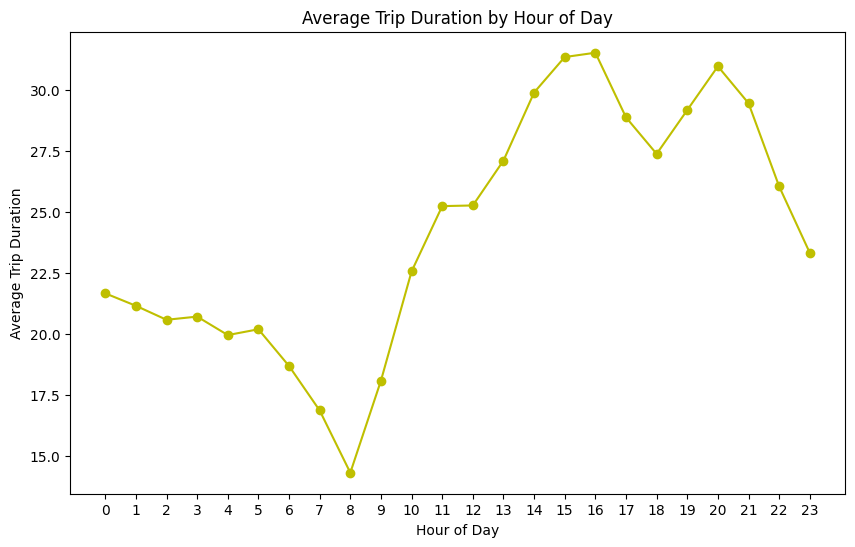

In [24]:
# Calculate average trip duration by hour of the day
df_avg_duration_by_hour_of_day = df.groupby(['Phour'])['Duration'].mean()

# Plot average trip duration by hour of the day
plt.figure(figsize=(10, 6))
plt.plot(df_avg_duration_by_hour_of_day.index, df_avg_duration_by_hour_of_day.values,'y-o')
plt.xlabel('Hour of Day')
plt.xticks(range(len(df_avg_duration_by_hour_of_day.index)))
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Hour of Day')
plt.show()

**Observation:**
1. From Total pick ups and Average Trip Duration every months in a year plots
- The data shows a clear trend of increased pick-ups during the late summer and early fall months. The highest pick-ups occur in September and October, followed by June, July, and August.
- The total pick ups and average trip duration is low in months: noverber, december and january. Since, This is the period of time in which south korea experiences winter season.
- the data suggests that the average trip duration is highest in May and September.
- due to a combination of factors, including increased congestion, increased tourism, and favorable weather conditions.
2. From Average Trip Duration by Day of Week plot, We can observe that the trip duration is higer during weekends.
3. From Average Trip Duration by Hour of Day plot, The average trip duration is higer from 15th to 20th hour of a day. Typically after working hours or evening time.

__From the above observation we can say that temperature and time are influential factors for the estimation of the trip duration.__

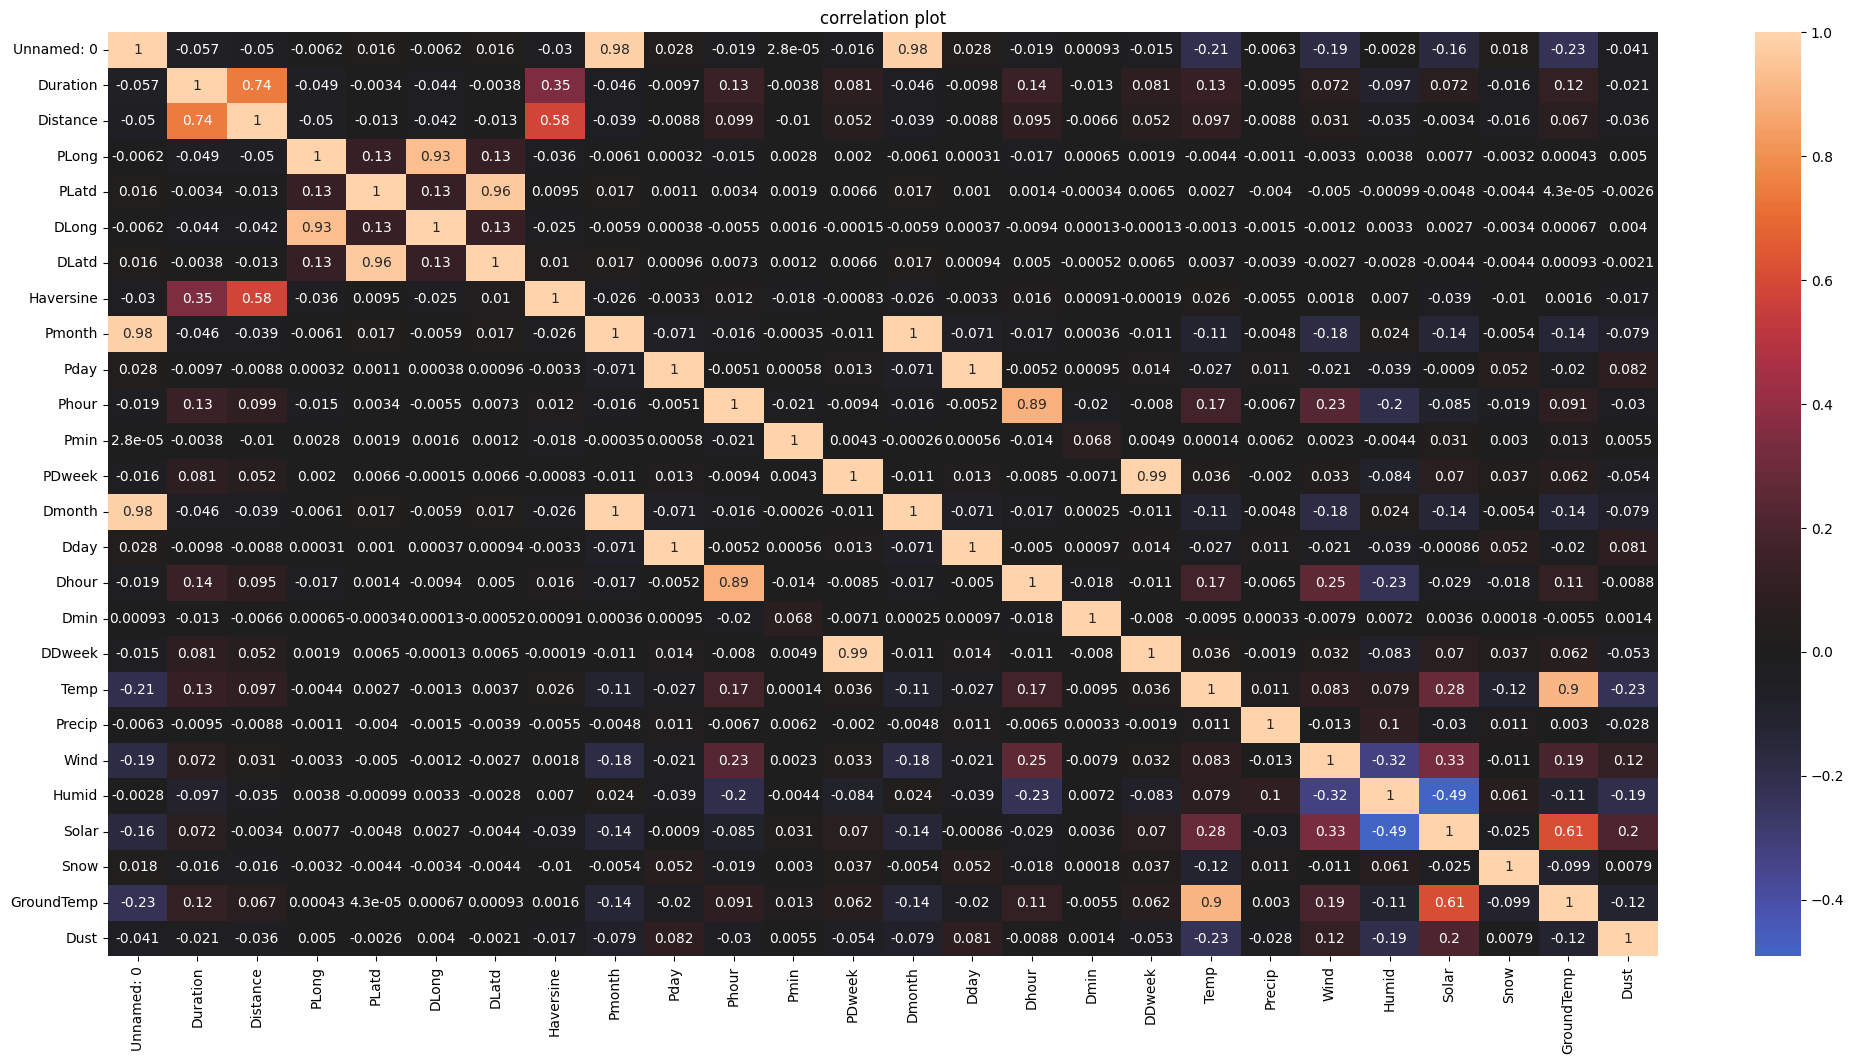

In [25]:
plt.figure(figsize = (25,12))
sns.heatmap(df.corr(),annot=True,center=0)
plt.title("correlation plot")
plt.show()

**Observations:**
- Plong and Dlong are highly correlated. but they represent the pick up and drop off longitudes.
- Platd and Dlatd are highly correlated. but they represent the pick up and drop off lattitudes.
- Temp and GroundTemp are highly correlated, and Temp has more correlation with Duration (target data) when compared with GroundTemp.

___

# **3. Data Preparation and Splitting**

In [26]:
df.columns

Index(['Unnamed: 0', 'Duration', 'Distance', 'PLong', 'PLatd', 'DLong',
       'DLatd', 'Haversine', 'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek',
       'Dmonth', 'Dday', 'Dhour', 'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind',
       'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust'],
      dtype='object')

In [27]:
df.shape

(9601139, 26)

In [28]:
df.dropna()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
6023108,6176536,19,3720,37.613956,127.030251,37.638706,127.015907,3.028153,9,13,3,54,3,9,13,4,15,3,20.9,0.0,1.7,68.0,0.00,0.0,20.0,27.0
8362825,8576807,16,2970,37.586388,126.935127,37.564541,126.927071,2.530896,11,5,13,45,0,11,5,14,2,0,16.8,0.0,1.1,46.0,1.71,0.0,23.2,58.0
8498770,8714908,5,980,37.464550,126.883728,37.456841,126.888344,0.949100,11,10,8,50,5,11,10,8,56,5,9.3,0.0,0.3,85.0,0.07,0.0,8.7,83.0
4485209,4599459,6,980,37.546307,127.049805,37.539654,127.052589,0.779438,8,1,12,17,2,8,1,12,23,2,36.8,0.0,1.3,39.0,2.80,0.0,54.9,37.0
4348700,4460101,59,8880,37.556610,126.898018,37.556610,126.898018,0.000000,7,27,21,17,4,7,27,22,16,4,30.3,0.0,1.1,75.0,0.00,0.0,30.2,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5657729,5800934,13,2390,37.596558,127.085838,37.610722,127.077477,1.738689,9,5,23,4,2,9,5,23,18,2,23.0,0.0,1.8,83.0,0.00,0.0,21.4,33.0
4647057,4764824,18,2490,37.552746,126.918617,37.569122,126.914795,1.851832,8,7,4,22,1,8,7,4,41,1,27.3,0.0,0.7,68.0,0.00,0.0,24.7,3.0
8905047,9127931,9,1540,37.574036,127.006721,37.582500,126.998535,1.185821,11,22,18,9,3,11,22,18,18,3,4.1,0.0,2.7,46.0,0.01,0.0,1.7,25.0
1259712,1288148,10,1140,37.557217,126.973007,37.561340,126.980400,0.796779,4,26,9,32,3,4,26,9,44,3,14.0,0.0,1.5,54.0,1.37,0.0,18.7,58.0


In [29]:
df['Speed'] = df['Distance'] / df['Duration']
df['Weather_Impact'] = df['Temp'] * df['Precip']
df['Time_of_Day'] = pd.cut(df['Phour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)


In [30]:
# Set the style of seaborn
sns.set(style="whitegrid")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


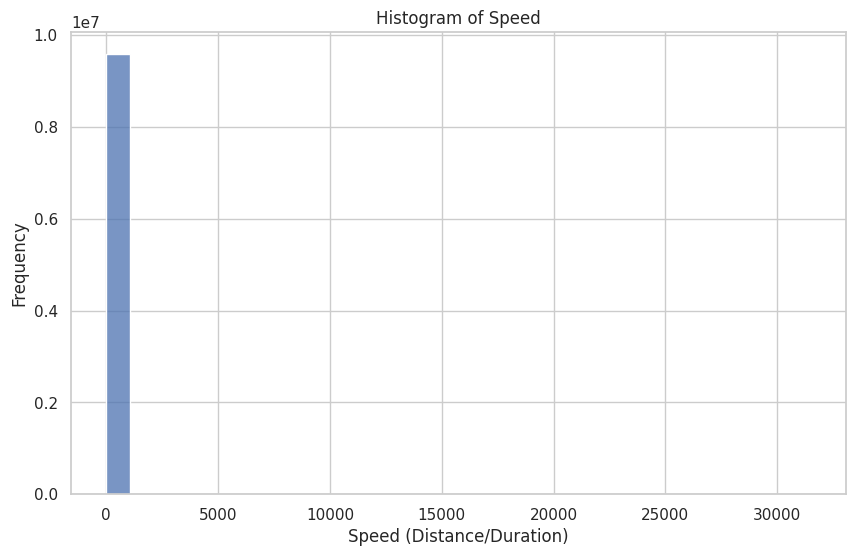

In [31]:
# Histogram for the Speed feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Speed'], kde=False, bins=30)
plt.title('Histogram of Speed')
plt.xlabel('Speed (Distance/Duration)')
plt.ylabel('Frequency')
plt.show()

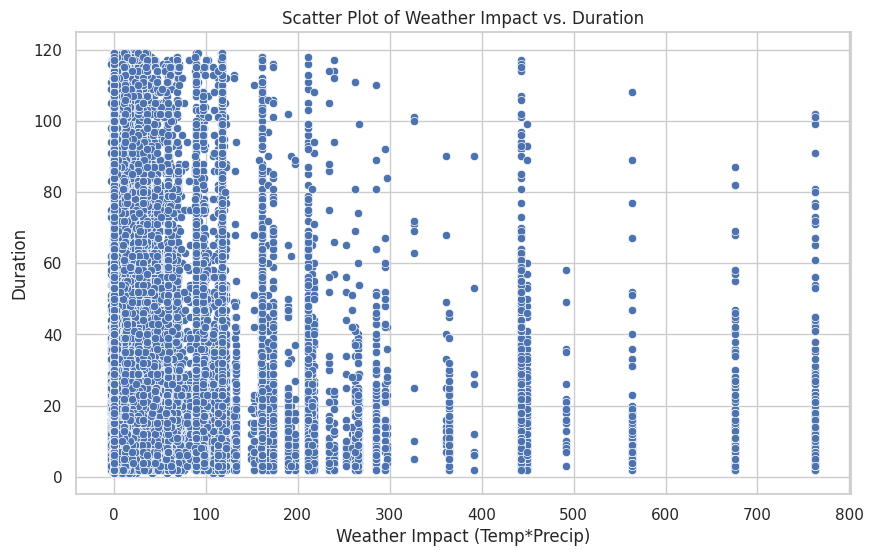

In [32]:
# Scatter plot for Weather Impact feature
# Assuming you have a target variable e.g. 'Total_Ride_Time', you can see how Weather Impact correlates with it
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Weather_Impact'], y=df['Duration'])  # Replace 'Duration' if your target variable is different
plt.title('Scatter Plot of Weather Impact vs. Duration')
plt.xlabel('Weather Impact (Temp*Precip)')
plt.ylabel('Duration')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


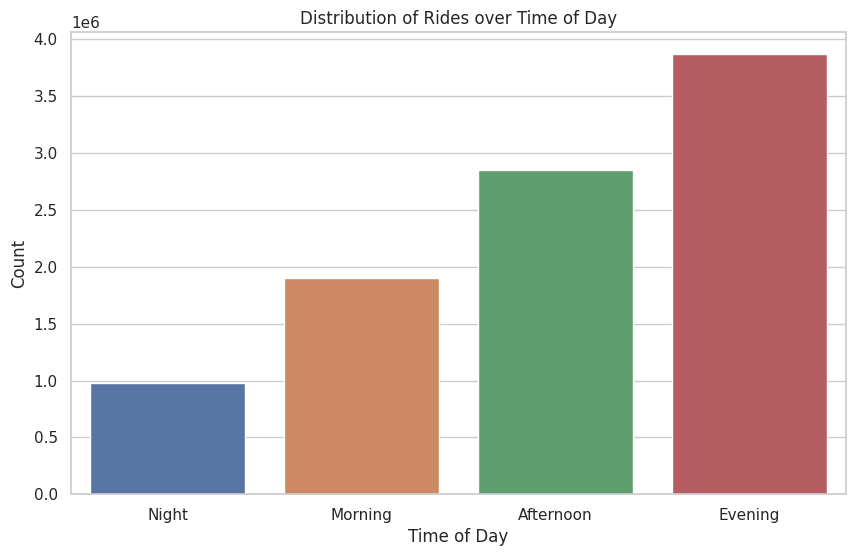

In [33]:
# Bar plot for Time of Day feature
plt.figure(figsize=(10, 6))
sns.countplot(x='Time_of_Day', data=df)
plt.title('Distribution of Rides over Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()

**Three new hand-crafted features:**
1. Speed - computed as Distance divided by Duration
2. Weather Impact - a simple interaction term between precipitation and temperature
3. Time of Day - categorizing hours into different parts of the day

In [34]:
# One-hot encoding for categorical features if necessary
df = pd.get_dummies(df, columns=['Time_of_Day', 'PDweek', 'DDweek'])

In [35]:
# Consider other pre-processing methods like scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Duration', axis=1))  
# Assuming 'Duration' is the target variable

In [36]:
# Perform feature selection using SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')  
selected_features = selector.fit_transform(scaled_features, df['Duration'])


Here we use f_regression as the score function to select top k features

'all' can be changed to a specific number if needed

In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, df['Duration'], test_size=0.2, random_state=42)

In [38]:
# Print the shape of the training and testing data
print("Training set:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

print("\nTesting set:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Training set:
X_train: (7680911, 43)
y_train: (7680911,)

Testing set:
X_test: (1920228, 43)
y_test: (1920228,)
